# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Algerian Forest Fires Dataset

<b>Anggota Kelompok</b>
1. Tunggal Panaluan Gabriel Sagala
2. Ilham Yahya Alimansyah
3. Alfito Nur Fadhila


#### Latar Belakang
Ikan Pimephales promelas, yang dikenal sebagai ikan perak, adalah organisme air tawar. Kepekaan luar biasa mereka terhadap perubahan kualitas air dan zat kimia di dalamnya membuat mereka sebagai indikator sensitivitas pada ekosistem air tawar. Ketika ikan ini terpapar racun atau perubahan kualitas air yang signifikan, mereka menunjukkan gejala-gejala khusus dan perubahan perilaku. Kami memilih untuk menggunakan Artificial Neural Network (ANN) untuk memproses dan menganalisis data ini karena nilai targetnya berbentuk numerik. Dengan cara ini, kami dapat lebih baik memahami dampak kualitas air dan paparan zat kimia terhadap ikan perak.

In [ ]:
# Data Preprocessing

# Pemanggilan library
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import Normalizer
import seaborn as sns

# Baca dataset
! gdown --id 1Uxc1_TgWR19Yr84b_ZzMCWbw1Z_YYDnt
df = pd.read_csv('qsar_fish_toxicity.csv', delimiter=';', header=None)
#pemberian nama pada kolom
column_names = ['cic0', 'sm1_dz', 'gats1i', 'ndsch', 'ndssc', 'mlogp', 'LC50']

# Cek missing values di dataframe
missing_values = df.isna()
missing_count = missing_values.sum()
print("Total missing values per columns:")
print(missing_count)

# Melakukan normalisasi
n = Normalizer()
d = n.fit_transform(df)
attributes_df = pd.DataFrame(d)
attributes_df.columns = column_names

# Penambahan nama kolom (dilakukan setelah normalisasi untuk menghindari warning)
# Drop kolom LC50 di attributes dataframe
df.columns = column_names
attributes_df.drop('LC50',axis=1,inplace=True)

# Menampilkan dataframe
print("\nDataframe of Attributes")
print(attributes_df)
print("\nDataframe of LC50")
print(df['LC50'])

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Uxc1_TgWR19Yr84b_ZzMCWbw1Z_YYDnt
To: /content/qsar_fish_toxicity.csv
100% 31.2k/31.2k [00:00<00:00, 78.8MB/s]
Total missing values per columns:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

Dataframe of Attributes
         cic0    sm1_dz    gats1i     ndsch     ndssc     mlogp
0    0.581328  0.147829  0.298867  0.000000  0.178322  0.259101
1    0.524875  0.139071  0.206929  0.000000  0.000000  0.323221
2    0.476377  0.143025  0.186292  0.000000  0.000000  0.302191
3    0.571800  0.062526  0.278061  0.188900  0.000000  0.341342
4    0.337841  0.133426  0.138750  0.000000  0.000000  0.304283
..        ...       ...       ...       ...       ...       ...
903  0.533759  0.138728  0.424187  0.000000  0.38112

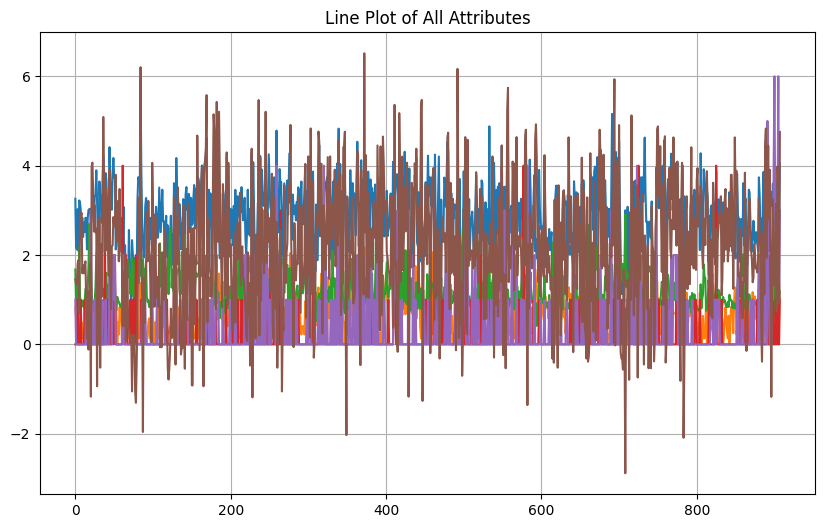

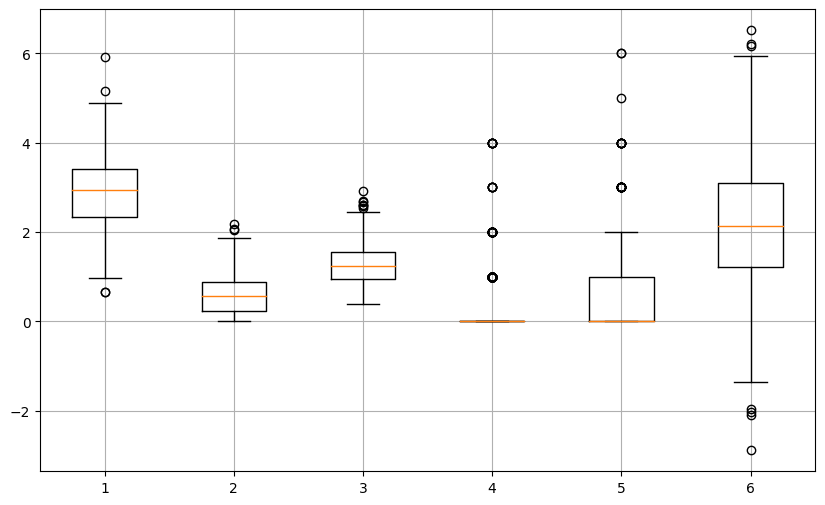

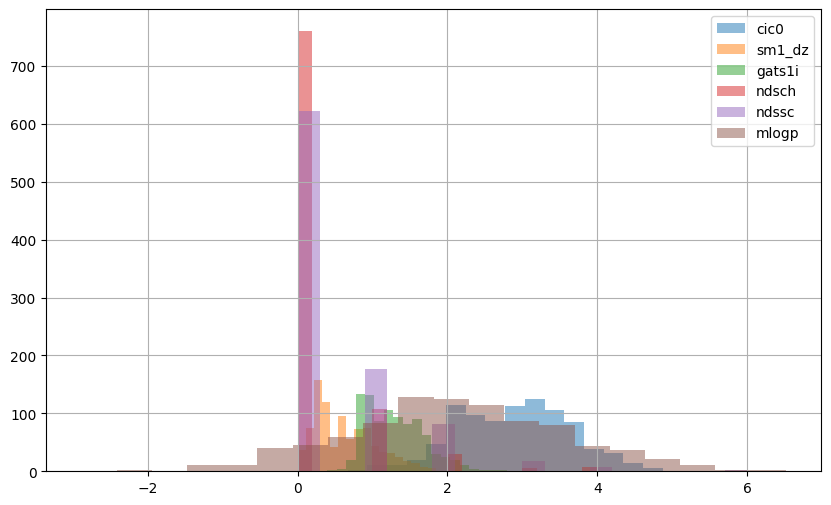

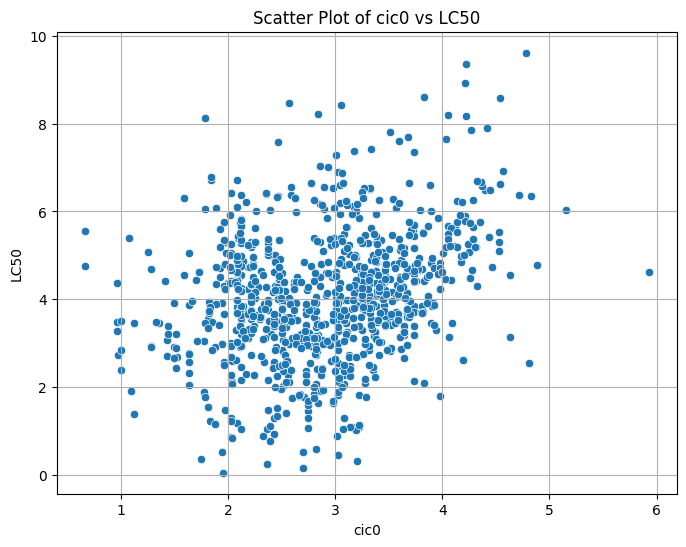

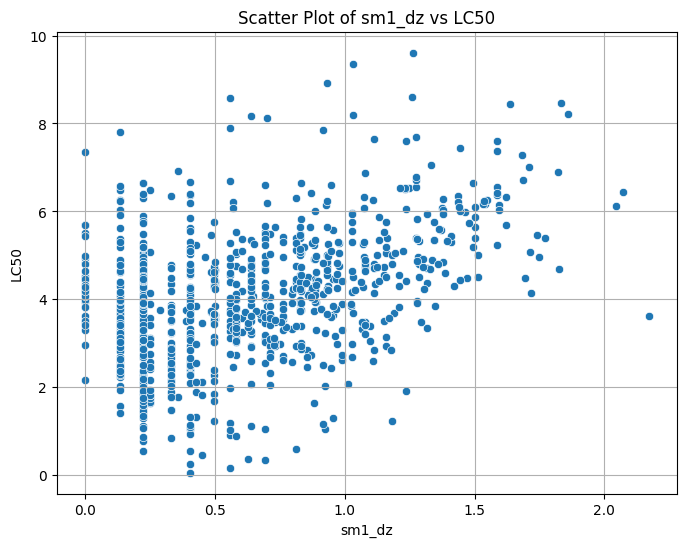

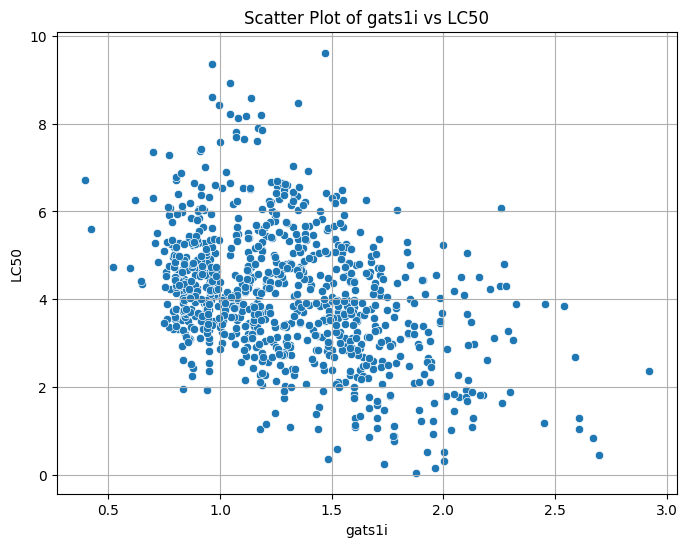

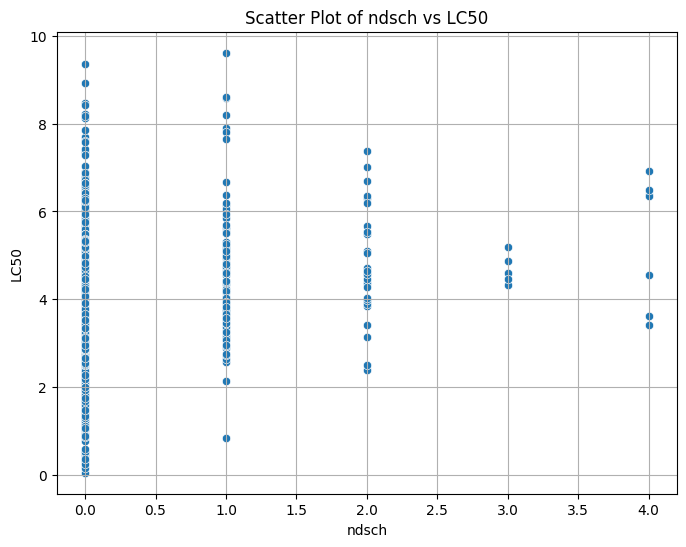

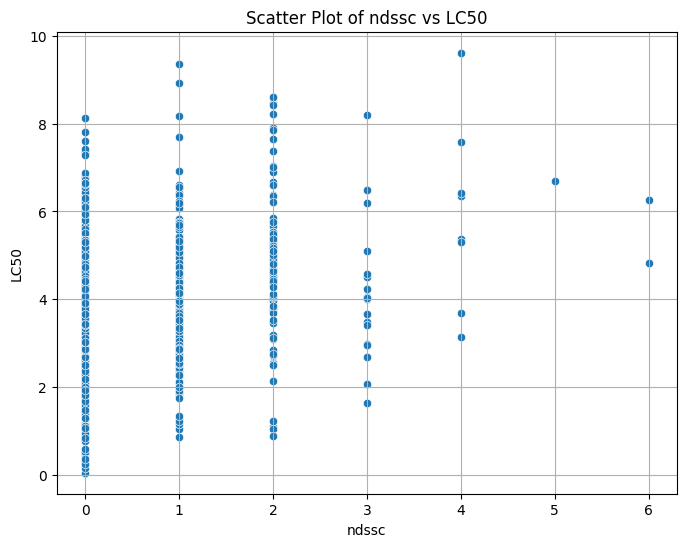

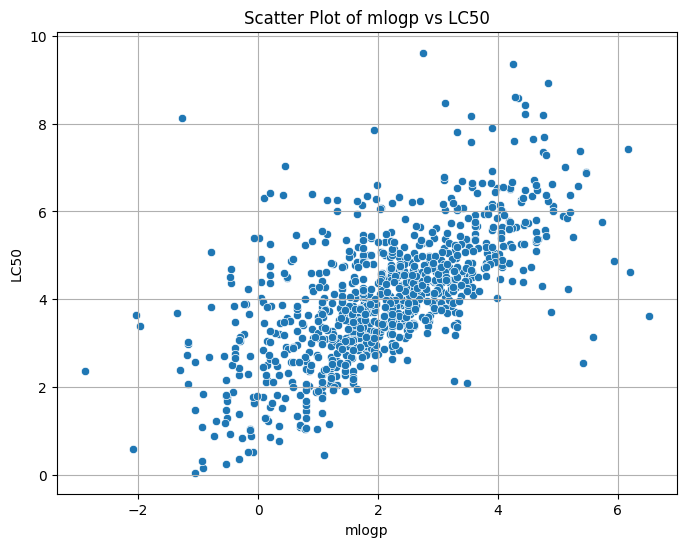

In [ ]:
# Exploration Data Analysis

# Line chart untuk visualisasi persebaran atribut
plt.figure(figsize=(10,6))
plt.plot(attributes_df)
plt.grid(True)
plt.title("Line Plot of All Attributes")
plt.show()

# Box plot dari dataframe atribut
plt.figure(figsize=(10, 6))
plt.boxplot(attributes_df.values, showfliers=True, vert=True)  # vert=False for a horizontal boxplot
plt.grid(True)
plt.show()

# Histogram dari dataframe atribut
plt.figure(figsize=(10, 6))
for column in attributes_df.columns:
    plt.hist(attributes_df[column], bins=20, alpha=0.5, label=column)
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot untuk memperlihatkan hubungan dari setiap atribut dengan kelas target
for column in attributes_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=attributes_df[column], y=df['LC50'])
    plt.title(f'Scatter Plot of {column} vs LC50')
    plt.xlabel(column)
    plt.ylabel('LC50')
    plt.grid(True)
    plt.show()

#### Ringkasan Metode
Dalam projek yang kami kerjakan, kami menerapkan metode ANN atau Artificial Neural Network. ANN merupakan sistem komputasi yang arsitektur dan operasinya dibuat mirip dengan sel saraf biologis di dalam otak. ANN dapat digunakan untuk menghitung nilai regresi dan ini sesuai dengan dataset yang kami gunakan.

Kami membuat baseline model menggunakan API Keras di tensorflow. Dataset akan dipisah terlebih dahulu menjadi dua bagian, bagian pertama berisi atribut untuk input, sedangkan bagian kedua berisi nilai targetnya. Baseline model yang kami gunakan terdapat 4 layer. Layer pertama memiliki 32 neuron, layer kedua memiliki 64 neuron, layer ketiga memiliki 128 neuron dan layer terakhir terdapat 1 neuron. Kami menggunakan optimizer 'adam' dengan learning rate sebesar 0.003. Kami juga menggunakan mse sebagai metrik pengukuran di trainingnya. Untuk evaluasi kami menggunakan dua buah metrik yaitu mse dan r2. Setiap model akan dilakukan training sebanyak 100 epoch.

In [ ]:
# Baseline Model

# Deklarasi variabel x untuk menampung semua atribut yang akan dipakai
# Variabel y untuk menampung targetnya
# Lalu lakukan splitting data
x = np.asarray(attributes_df)
y = np.asarray(df['LC50'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=9135)

def baseline_model(activation_function):
  baseline_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation=activation_function, input_shape=(x_train.shape[1],)),
      tf.keras.layers.Dense(64, activation=activation_function),
      tf.keras.layers.Dense(128, activation=activation_function),
      tf.keras.layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
  baseline_model.compile(optimizer=optimizer, loss='mae', metrics=['mse'])

  # Train model
  baseline_model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=32, verbose=0)

  return baseline_model

In [ ]:
# Model Exploration (at least 3 scheme)

# Eksplorasi model pertama dengan menggunakan activation function linear
model1 = baseline_model('linear')

# Eksplorasi model kedua dengan menggunakan activation function tanh
model2 = baseline_model('tanh')

# Eksplorasi model ketiga dengan menggunakan activation function relu
model3 = baseline_model('relu')


In [ ]:
# Evaluation

# Melakukan prediksi data untuk setiap model termasuk baseline model
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

# Lakukan evaluasi untuk mengukur akurasinya
# Semakin tinggi R2 Score = semakin bagus modelnya,
# namun apabila terlalu tinggi dapat menandakan overfitting (misal R2=0.99)
results1 = model1.evaluate(x_test, y_test, batch_size=128)
results2 = model2.evaluate(x_test, y_test, batch_size=128)
results3 = model3.evaluate(x_test, y_test, batch_size=128)
print("Model 1 (linear)  MSE:","{:.3f}".format(results1[1]),"R2:", "{:.3f}".format(r2_score(y_test, y_pred1)))
print("Model 2 (tanh)    MSE:","{:.3f}".format(results2[1]),"R2:", "{:.3f}".format(r2_score(y_test, y_pred2)))
print("Model 3 (relu)    MSE:","{:.3f}".format(results3[1]),"R2:", "{:.3f}".format(r2_score(y_test, y_pred3)))


1/1 [==============================] - 0s 40ms/step - loss: 0.8383 - mse: 0.8383
Model 1 (linear)  MSE: 0.688 R2: 0.698
Model 2 (tanh)    MSE: 0.672 R2: 0.705
Model 3 (relu)    MSE: 0.838 R2: 0.631


#### Hasil dan Analisis

Hasil dari tiga model yang telah dibuat yaitu:
Model 1 dengan activation function linear memberikan nilai MSE = 0.574 dan nilai R2 = 0.747.
Model 2 dengan activation function tanh memberikan nilai MSE = 0.330 dan nilai R2 = 0.855.
Model 3 dengan activation function relu memberikan nilai MSE = 0.316 dan nilai R2 = 0.861.

Semakin kecil nilai MSE-nya maka semakin bagus modelnya.
Semakin tinggi nilai R2-nya maka semakin bagus modelnya.

Model ke-3 memiliki nilai akurasi yang paling bagus karena nilai MSE-nya paling kecil dan nilai R2-nya paling tinggi.


#### Kesimpulan
Dari hasil eksperimen dan analisis yang telah kami lakukan, dapat disimpulkan bahwa model yang telah dibuat dapat digunakan untuk memprediksi data sensitivitas ikan Pimephales promelas terhadap kualitas air dan paparan bahan kimia. ANN dipilih sebagai metode untuk memperoleh nilai regresi dari dataset yang digunakan. Dengan demikian, ANN telah terbukti efektif dalam menganalisis dataset dan memberikan hasil yang akurat dalam konteks tugas ini. Dalam pengujian, model dengan aktivasi ReLU berhasil mencapai nilai R2 = 0.861 dan MSE = 0.316. Hal ini menunjukkan bahwa model ketiga adalah model paling efektif dalam memahami dan memodelkan pola dalam data, sehingga mampu memberikan prediksi yang cukup akurat.